In [117]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

In [59]:
def show_image(arr, name):
    if not isinstance(arr, np.ndarray):
        print("ERROR:", name, "is not an ndarray.")
        return
    
    print("NDArray: '{}' shape: {} dtype: {}".format(name, arr.shape, arr.dtype))
    
    if len(arr.shape) == 3:
        plt.imshow(arr)
    elif len(arr.shape) == 2:
        plt.imshow(arr, cmap='gray')
    else:
        print("This is not an image.")
        
    plt.show()

NDArray: 'image' shape: (540, 960, 3) dtype: uint8


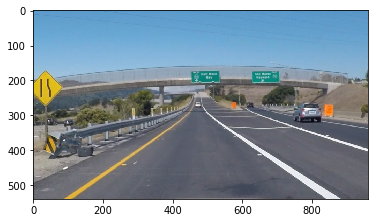

In [60]:
image = mpimg.imread('exit-ramp.jpg')
show_array(image, 'image')

In [110]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

NDArray: 'gray' shape: (540, 960) dtype: uint8


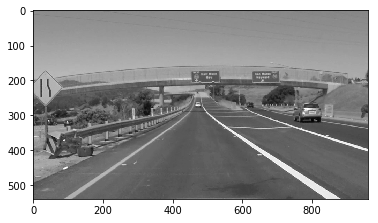

In [111]:
show_array(gray, 'gray')

NDArray: 'gray_blurred' shape: (540, 960) dtype: uint8


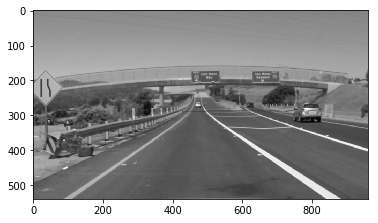

In [112]:
kernel_size = 3
gray_blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

show_array(gray_blurred, 'gray_blurred')

NDArray: 'edges' shape: (540, 960) dtype: uint8


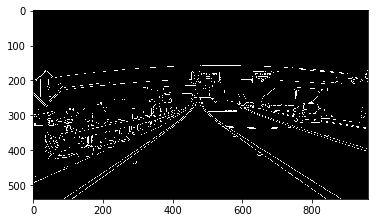

In [113]:
edges = cv2.Canny(gray_blurred, 100, 200)
show_array(edges, 'edges')

NDArray: 'masked_edges' shape: (540, 960) dtype: uint8


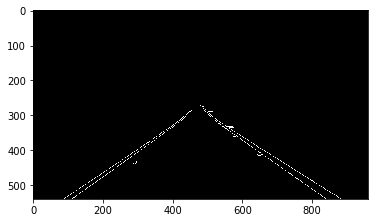

In [115]:
xdim = edges.shape[1]
ydim = edges.shape[0]

ignore_mask_color = 255

vertices = np.array([[(0,ydim), (xdim*0.45, ydim*0.55), (xdim*0.5, ydim*0.5), (xdim, ydim)]], dtype=np.int32)
mask = np.zeros_like(edges)  
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

show_array(masked_edges, 'masked_edges')

(7, 1, 4)
array([[[585, 361, 826, 530]],

       [[627, 379, 881, 538]],

       [[280, 411, 405, 326]],

       [[112, 538, 246, 444]],

       [[108, 525, 218, 453]],

       [[237, 450, 349, 371]],

       [[176, 480, 263, 423]]], dtype=int32)
NDArray: 'line_image' shape: (540, 960, 3) dtype: uint8


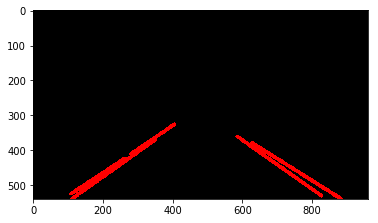

In [118]:
rho = 1
theta = math.pi/180
min_votes = 50
min_line_length = 50
max_line_gap = 1
lines = cv2.HoughLinesP(masked_edges, rho, theta, min_votes, np.array([]), min_line_length, max_line_gap)

from pprint import pprint
print(lines.shape)
pprint(lines[:10])

#pprint(lines.ravel()[:10])
#show_array(lines, 'lines')

# Create a blank canvas
line_image = image * 0

# Now draw the detected lines on it.
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
        
show_array(line_image, 'line_image')
    